In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
#increase font size of all elements
sns.set(font_scale=1.2)

In [2]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Data 1 Workshop Pandemi**

In [3]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/workshop_pandemi.xlsx")

In [4]:
data.head()

,Respondent ID,Pekerjaan,Domisili,Rating Kelas Tips Menghadapi Masa Sulit Mencari Kerja di Masa Pandemi : Mental Health,"Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?",Rating Instruktur,Masukkan Pelatihan
0,1.293009e+10,Jobseeker,"Karawang, Jawa Barat",5.0,6.0,5.0,NaN
1,1.292974e+10,BELUM BEKERJA,BEKASI,4.0,8.0,5.0,NaN
2,1.292948e+10,Swasta,Ngawi,4.0,7.0,4.0,NaN
3,1.292884e+10,-,-,4.0,7.0,4.0,NaN
4,1.292840e+10,Mahasiswa,JAKARTA TIMUR,4.0,9.0,4.0,NaN


In [5]:
data.Pekerjaan.value_counts()

Mahasiswa                                10
-                                         8
Fresh Graduate                            4
Belum bekerja                             3
Jobseeker                                 2
Swasta                                    2
Freshgraduate                             2
Belum kerja, doain semoga cepet dapet     1
job seeker                                1
Mahasiswi/Fresh graduate                  1
karyawan                                  1
Tidak ada                                 1
Pelajar                                   1
Wirausaha                                 1
freelancer                                1
Fresh graduated                           1
Karyawan Swasta                           1
Mencari Kerja (Pencaker)                  1
MAHASISWA                                 1
BELUM BEKERJA                             1
Wiraswasta                                1
Belum Bekerja                             1
belum bekerja                   

## **Data 1 Preprocesing**

In [6]:
data['Pekerjaan'] = data['Pekerjaan'].replace('Mencari Kerja (Pencaker)', 'Jobseeker')
data['Pekerjaan'] = data['Pekerjaan'].replace('Belum kerja, doain semoga cepet dapet', 'Jobseeker')
data['Pekerjaan'] = data['Pekerjaan'].replace('Mahasiswi/Fresh graduate', 'Fresh graduate')
data['Pekerjaan'] = data['Pekerjaan'].replace('Freshgraduate', 'Fresh graduate')
data['Pekerjaan'] = data['Pekerjaan'].replace('Fresh graduated', 'Fresh graduate')
data['Pekerjaan'] = data['Pekerjaan'].replace('job seeker', 'Jobseeker')
data['Pekerjaan'] = data['Pekerjaan'].replace('Fresh graduate & job seeker', 'Fresh graduate')
data['Pekerjaan'] = data['Pekerjaan'].replace('Karyawan Swasta', 'Karyawan')
data['Pekerjaan'] = data['Pekerjaan'].replace('Swasta', 'Karyawan')
data['Pekerjaan'] = data['Pekerjaan'].replace('karyawan', 'Karyawan')
data['Pekerjaan'] = data['Pekerjaan'].replace('Mahasiswa', 'Mahasiswa/Mahasiswi')
data['Pekerjaan'] = data['Pekerjaan'].replace('MAHASISWI', 'Mahasiswa/Mahasiswi')
data['Pekerjaan'] = data['Pekerjaan'].replace('MAHASISWA', 'Mahasiswa/Mahasiswi')
data['Pekerjaan'] = data['Pekerjaan'].replace('Pelajar/Mahasiswa', 'Mahasiswa/Mahasiswi')
data['Pekerjaan'] = data['Pekerjaan'].replace('Pelajar', 'Mahasiswa/Mahasiswi')
data['Pekerjaan'] = data['Pekerjaan'].replace('BELUM BEKERJA', 'Belum bekerja')
data['Pekerjaan'] = data['Pekerjaan'].replace('Belum Bekerja', 'Belum bekerja')
data['Pekerjaan'] = data['Pekerjaan'].replace('belum bekerja', 'Belum bekerja')
data['Pekerjaan'] = data['Pekerjaan'].replace('-', 'Tidak ada')

In [7]:
data.Domisili.value_counts()

Depok                   4
Bandung                 4
Bekasi                  3
JAKARTA TIMUR           2
Pekanbaru               2
Kediri                  2
Surabaya                2
Malang                  2
Jakarta Selatan         2
Karawang, Jawa Barat    1
kota bekasi             1
Jakarta Sealatan        1
Bengkulu                1
bekasi                  1
Tegal                   1
Kab. Bandung Barat      1
Sidoarjo                1
tegal                   1
Serang-Banten           1
Bogor                   1
jakarta                 1
Tangerang Selatan       1
Kabupaten Mojokerto     1
Kota Malang             1
JAWA BARAT              1
Kota Bogor              1
BEKASI                  1
Jakarta                 1
Magelang                1
MADIUN                  1
BOGOR                   1
Nganjuk                 1
Tangerang               1
DKI Jakarta             1
-                       1
Ngawi                   1
Banjarmasin             1
Name: Domisili, dtype: int64

In [8]:
data.Domisili.value_counts()

Depok                   4
Bandung                 4
Bekasi                  3
JAKARTA TIMUR           2
Pekanbaru               2
Kediri                  2
Surabaya                2
Malang                  2
Jakarta Selatan         2
Karawang, Jawa Barat    1
kota bekasi             1
Jakarta Sealatan        1
Bengkulu                1
bekasi                  1
Tegal                   1
Kab. Bandung Barat      1
Sidoarjo                1
tegal                   1
Serang-Banten           1
Bogor                   1
jakarta                 1
Tangerang Selatan       1
Kabupaten Mojokerto     1
Kota Malang             1
JAWA BARAT              1
Kota Bogor              1
BEKASI                  1
Jakarta                 1
Magelang                1
MADIUN                  1
BOGOR                   1
Nganjuk                 1
Tangerang               1
DKI Jakarta             1
-                       1
Ngawi                   1
Banjarmasin             1
Name: Domisili, dtype: int64

In [9]:
data.drop(data.index[data['Domisili'] == '-'], inplace = True)

In [10]:
data['Domisili'] = data['Domisili'].replace('Jakarta Sealatan', 'Jakarta')
data['Domisili'] = data['Domisili'].replace('bekasi', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('kota bekasi ', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('BEKASI', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('Kota Bogor', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('BOGOR', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('Jakarta Selatan', 'Jakarta')
data['Domisili'] = data['Domisili'].replace('DKI Jakarta', 'Jakarta')
data['Domisili'] = data['Domisili'].replace('jakarta', 'Jakarta')
data['Domisili'] = data['Domisili'].replace('tegal', 'Jawa Tengah')
data['Domisili'] = data['Domisili'].replace('JAKARTA TIMUR', 'Jakarta')
data['Domisili'] = data['Domisili'].replace('Kabupaten Mojokerto', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Karawang, Jawa Barat', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('Kota Malang', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Tangerang Selatan', 'Banten')
data['Domisili'] = data['Domisili'].replace('Kab. Bandung Barat', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('JAWA BARAT', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('Serang-Banten', 'Banten')
data['Domisili'] = data['Domisili'].replace('MADIUN', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Sidoarjo', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Depok', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('Tangerang', 'Banten')
data['Domisili'] = data['Domisili'].replace('Bekasi', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('Malang', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Kediri', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Nganjuk', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Ngawi', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Surabaya', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Tegal', 'Jawa Tengah')
data['Domisili'] = data['Domisili'].replace('Sidoarjo', 'Jawa Timur')
data['Domisili'] = data['Domisili'].replace('Bogor', 'Jawa Barat')
data['Domisili'] = data['Domisili'].replace('Magelang ', 'Jawa Tengah')
data['Domisili'] = data['Domisili'].replace('Bandung', 'Jawa Barat')

In [11]:
data['Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?'].value_counts()

8.000000     19
9.000000     12
10.000000     8
7.000000      5
5.000000      3
6.000000      2
4.000000      1
8.098039      1
Name: Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?, dtype: int64

In [12]:
data['Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?'].value_counts()

8.000000     19
9.000000     12
10.000000     8
7.000000      5
5.000000      3
6.000000      2
4.000000      1
8.098039      1
Name: Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?, dtype: int64

In [13]:
#def brac(x):
    #if (x>=7):
        #return 'Percaya Diri'
    #elif(x>=4):
        #return 'Cukup Percaya Diri'
    #else:
        #return 'Tidak Percaya Diri'

In [14]:
#data['Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?']=data['Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?'].apply(brac)

In [15]:
data.head()

,Respondent ID,Pekerjaan,Domisili,Rating Kelas Tips Menghadapi Masa Sulit Mencari Kerja di Masa Pandemi : Mental Health,"Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?",Rating Instruktur,Masukkan Pelatihan
0,1.293009e+10,Jobseeker,Jawa Barat,5.0,6.0,5.0,NaN
1,1.292974e+10,Belum bekerja,Jawa Barat,4.0,8.0,5.0,NaN
2,1.292948e+10,Karyawan,Jawa Timur,4.0,7.0,4.0,NaN
4,1.292840e+10,Mahasiswa/Mahasiswi,Jakarta,4.0,9.0,4.0,NaN
5,1.292837e+10,Mahasiswa/Mahasiswi,Jakarta,4.0,5.0,4.0,NaN


## **Data 1 Visualisasi**

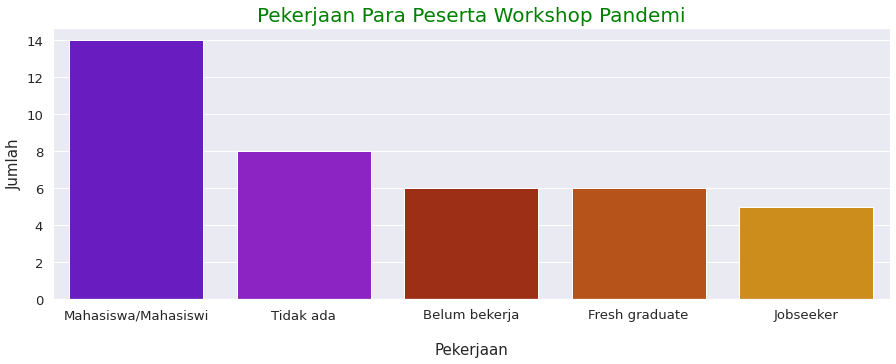

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x = data.Pekerjaan.value_counts().head(5).index, y = data.Pekerjaan.value_counts().head(5).values, palette='gnuplot')
plt.xlabel('Pekerjaan', size = 15, labelpad=20)
#plt.xticks(rotation=45)
plt.ylabel('Jumlah', size = 15)
plt.title('Pekerjaan Para Peserta Workshop Pandemi', color = 'green', size = 20)
plt.show()

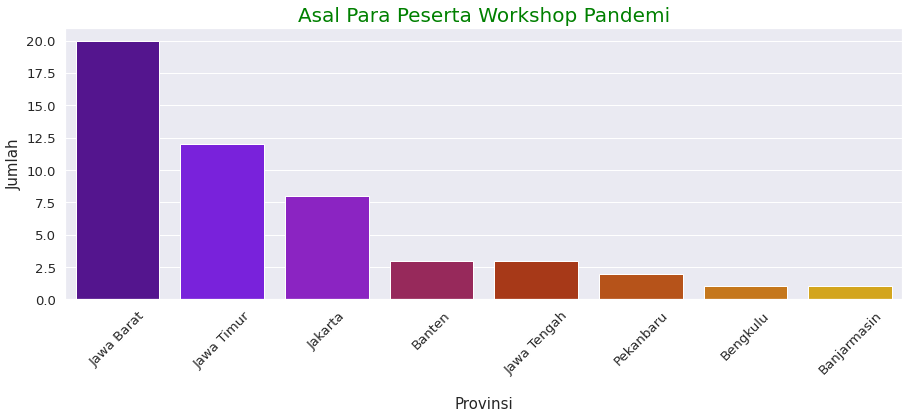

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(data =data, x = data.Domisili.value_counts().head(20).index, y = data.Domisili.value_counts().head(20).values, palette='gnuplot')
plt.xlabel('Provinsi', size = 15, labelpad=20)
plt.xticks(rotation=45)
plt.ylabel('Jumlah', size = 15)
plt.title('Asal Para Peserta Workshop Pandemi', color = 'green', size = 20)
plt.show()

Text(0.5, 1.0, 'Kepercayaan Diri Setelah Mengikuti Kelas')

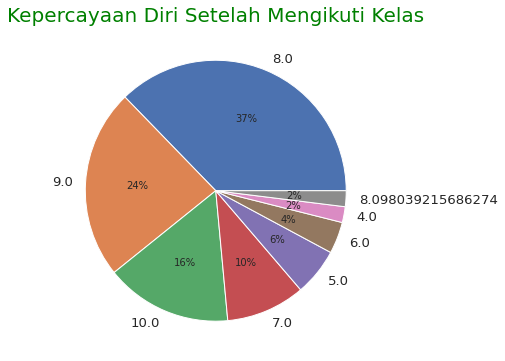

In [18]:
nilaipc = data['Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?'].value_counts().values
judulpc = data['Setelah mengikuti kelas, seberapa percaya dirikah Anda dalam bidang ini?'].value_counts().index

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(nilaipc, labels = judulpc, autopct='%1.0f%%')
ax.set_title('Kepercayaan Diri Setelah Mengikuti Kelas', color = 'green', size = 20)

## **Data 2 Adobe Creative Workshop Tanggal 17 juni**

In [19]:
data2 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/Adobe Creative Workshop.xlsx")

In [20]:
data2.head()

,ID,Pekerjaan,Domisili,Seberapa puas Anda dengan topik yang disajikan di webinar ini?,"Setelah mengikuti webinar ini, seberapa percaya diri kah Anda dengan pengetahuan Anda terkait topik dibawah ini?",Bagaimana sertifikasi dapat meningkatkan kepercayaan dan kepuasan pelanggan,Bagaimana sertifikasi dapat menambah nilai karya dan meningkatkan penghasilan,Copyright dan intellectual property untuk karya Anda,Perlu diperbaiki : Proses registrasi webinar tidak mudah dipahami,Perlu Diperbaiki : Konten / materi pembelajaran kurang sesuai dengan topik webinar,...,Faktor mengambil sertifikasi : Biaya,Faktor mengambil sertifikasi : Waktu,Faktor mengambil sertifikasi : Tingkat kesulitan,Faktor mengambil sertifikasi : Saya masih tidak yakin akan keuntungan dari sertifikasi Adobe,Faktor mengambil sertifikasi : Lainnya,Kertertarikan Mengambil Sertifikasi : Mempelajari skill yang berguna,Kertertarikan Mengambil Sertifikasi : Meningkatkan kualifikasi yang diakui industri,Kertertarikan Mengambil Sertifikasi : Meningkatkan peluang mendapat pekerjaan,Kertertarikan Mengambil Sertifikasi : Mudah untuk dilakukan,Apakah Anda bersedia untuk kami hubungi lebih lanjut terkait sertifikat Adobe?
0,1.277744e+10,Mahasiswa,Yogyakarta,5.0,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,NaN,NaN,...,Biaya,NaN,NaN,NaN,NaN,NaN,Meningkatkan kualifikasi yang diakui industri,NaN,NaN,"Ya, saya bersedia"
1,1.277721e+10,Belum,Depok,5.0,3,4,4,4,NaN,NaN,...,NaN,NaN,NaN,NaN,Pengalaman,Mempelajari skill yang berguna,NaN,NaN,NaN,"Ya, saya bersedia"
2,1.277713e+10,Mahasiswa,Depok,5.0,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,NaN,NaN,...,NaN,Waktu,NaN,NaN,NaN,Mempelajari skill yang berguna,Meningkatkan kualifikasi yang diakui industri,Meningkatkan peluang mendapat pekerjaan,NaN,"Ya, saya bersedia"
3,1.277625e+10,-,-,3.0,1 - Sangat tidak percaya diri,2,2,3,Proses registrasi webinar tidak mudah dipahami,NaN,...,Biaya,Waktu,NaN,NaN,NaN,Mempelajari skill yang berguna,Meningkatkan kualifikasi yang diakui industri,Meningkatkan peluang mendapat pekerjaan,NaN,"Ya, saya bersedia"
4,1.277619e+10,Freelancer,Jakarta Selatan,4.0,4,4,4,4,NaN,NaN,...,Biaya,NaN,NaN,NaN,NaN,Mempelajari skill yang berguna,NaN,NaN,NaN,Tidak bersedia


In [21]:
data2['Pekerjaan'].value_counts()

Mahasiswa                         21
-                                  5
Freelancer                         5
Freelance                          4
Karyawan Swasta                    2
Penulis                            2
Freshgraduate                      2
mahasiswi                          2
pelajar                            2
Pelajar                            2
Mahasiswi                          2
Swasta                             1
Freelance Illustrator              1
Guru Private                       1
Jobe Seeker                        1
Siswa                              1
Fresh graduate                     1
Belum bekerja (Fresh Graduate)     1
Content writer                     1
Wiraswasta                         1
Fresh Graduate                     1
Freelance graphic designer         1
mahasiswa                          1
Belum                              1
belum bekerja                      1
SGS Smartfren                      1
Ibu rumah tangga                   1
B

In [22]:
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Karyawan swasta ', 'Karyawan')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Karyawan swasta', 'Karyawan')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Belum bekerja (Fresh Graduate)', 'Fresh Graduate')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Freshgraduate', 'Fresh Graduate')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Fresh graduate', 'Fresh Graduate')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Freelance Illustrator', 'Freelancer')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Freelance Graphic Designer', 'Freelancer')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Freelance graphic designer ', 'Freelancer')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('SGS Smartfren', 'Karyawan')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('IT Development (CMS)', 'Karyawan')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Frontliner', 'Karyawan')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Swasta', 'Karyawan')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Karyawan Swasta', 'Karyawan')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Freelance', 'Freelancer')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Mahasiswa', 'Mahasiswa/Mahasiswi')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Mahasiswi', 'Mahasiswa/Mahasiswi')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('mahasiswi', 'Mahasiswa/Mahasiswi')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('mahasiswa', 'Mahasiswa/Mahasiswi')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('pelajar', 'Pelajar')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Siswa', 'Pelajar')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Jobe Seeker', 'Job Seeker')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('belum bekerja', 'Job Seeker')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Belum bekerja', 'Job Seeker')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('Belum', 'Job Seeker')
data2['Pekerjaan'] = data2['Pekerjaan'].replace('-', 'Tidak Ingin Menyebutkan')

In [23]:
data2['Domisili'].value_counts()

Bekasi                                   5
Surabaya                                 4
Yogyakarta                               3
Jakarta                                  3
Depok                                    3
Kota Probolinggo                         2
malang                                   2
Medan                                    2
Semarang                                 2
Jakarta Selatan                          2
Lampung                                  2
Pati                                     1
magelang                                 1
Garut                                    1
Bondowoso                                1
Cilacap                                  1
Kota Batu                                1
Sungailiat                               1
Indonesia                                1
Makassar                                 1
Ponorogo                                 1
Cilegon                                  1
Kalimantan Tengah                        1
Salatiga   

In [24]:
data2['Domisili'] = data2['Domisili'].replace('Bekasi', 'Jawa Barat')
data2['Domisili'] = data2['Domisili'].replace('Surabaya', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Depok', 'Jawa Barat')
data2['Domisili'] = data2['Domisili'].replace('malang', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Kota Probolinggo', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Jakarta Selatan', 'Daerah Khusus Ibukota Jakarta')
data2['Domisili'] = data2['Domisili'].replace('Semarang', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Medan', 'Sumatera Utara')
data2['Domisili'] = data2['Domisili'].replace('Ponorogo', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Garut', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Cilacap', 'Jawa Barat')
data2['Domisili'] = data2['Domisili'].replace('Kota Batu', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Bandung', 'Jawa Barat')
data2['Domisili'] = data2['Domisili'].replace('Malang', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Klaten, Jawa Tengah', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Tabanan, Bali ', 'Bali')
data2['Domisili'] = data2['Domisili'].replace('Sungailiat', 'Kepulauan Bangka Belitung')
data2['Domisili'] = data2['Domisili'].replace('magelang', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Probolinggo', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Tangerang', 'Banten')
data2['Domisili'] = data2['Domisili'].replace('Jakarta Utara', 'Daerah Khusus Ibukota Jakarta')
data2['Domisili'] = data2['Domisili'].replace('Makassar', 'Sulawesi Selatan')
data2['Domisili'] = data2['Domisili'].replace('Pati', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Kasindir', 'Sumatera Utara')
data2['Domisili'] = data2['Domisili'].replace('Purwodadi', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Jakarta barat', 'Daerah Khusus Ibukota Jakarta')
data2['Domisili'] = data2['Domisili'].replace('jakarta barat', 'Daerah Khusus Ibukota Jakarta')
data2['Domisili'] = data2['Domisili'].replace('Salatiga', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Pati', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Cilegon', 'Banten')
data2['Domisili'] = data2['Domisili'].replace('Indonesia', '-')
data2['Domisili'] = data2['Domisili'].replace('Bekasi Utara', 'Jawa Barat')
data2['Domisili'] = data2['Domisili'].replace('Bondowoso', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Lamongan', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('surabaya', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Bogor', 'Jawa Barat')
data2['Domisili'] = data2['Domisili'].replace('Sidoarjo-Jawa Timur', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Tanjungpinang ', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Kec. Bekasi Timur', 'Jawa Barat')
data2['Domisili'] = data2['Domisili'].replace('Denpasar, Bali', 'Bali')
data2['Domisili'] = data2['Domisili'].replace('Tabanan - Bali', 'Bali')
data2['Domisili'] = data2['Domisili'].replace('Kota Semarang, Jawa Tengah, Indonesia', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Semarang, Jawa Tengah, Indonesisa', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Palembang', 'Sumatera Selatan')
data2['Domisili'] = data2['Domisili'].replace('Tanjungpinang', 'Riau')
data2['Domisili'] = data2['Domisili'].replace('Ngawi', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Demak', 'Jawa Tengah')
data2['Domisili'] = data2['Domisili'].replace('Lumajang', 'Jawa Timur')
data2['Domisili'] = data2['Domisili'].replace('Tangerang Selatan', 'Banten')
data2['Domisili'] = data2['Domisili'].replace('Jakarta', 'Daerah Khusus Ibukota Jakarta')
data2['Domisili'] = data2['Domisili'].replace('Yogyakarta', 'Daerah Istimewa Yogyakarta')

In [25]:
dts2 = data2['Perlu Diperbaiki : Durasi webinar terlalu singkat, sehingga materi yang disampaikan kurang mendalam'].count()
rtm2 = data2['Perlu diperbaiki : Proses registrasi webinar tidak mudah dipahami'].count()
wki2 = data2['Perlu Diperbaiki : Webinar kurang interaktif'].count()
krs2 = data2['Perlu Diperbaiki : Konten / materi pembelajaran kurang sesuai dengan topik webinar'].count()
skm2 = data2['Perlu Diperbaiki : Speaker kurang mendalami materi yang disampaikan'].count()

print(dts2)
print(rtm2)
print(wki2)
print(krs2)
print(skm2)

41
11
11
4
0


In [26]:
#from google.colab import drive
#drive.mount('/drive')
#data2.to_excel('/drive/My Drive/Adobe Creative Workshop Baru.xlsx')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


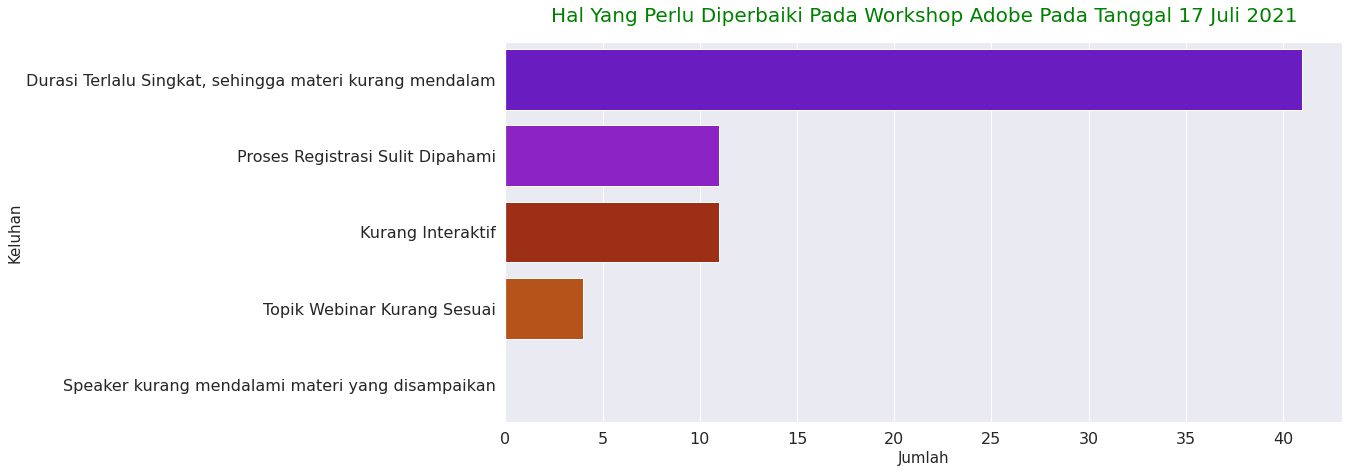

In [27]:
datax2 = [dts2, rtm2, wki2, krs2,skm2]
datay2 = ['Durasi Terlalu Singkat, sehingga materi kurang mendalam','Proses Registrasi Sulit Dipahami','Kurang Interaktif','Topik Webinar Kurang Sesuai','Speaker kurang mendalami materi yang disampaikan']

plt.figure(figsize=(15,7))
#plt.bar(datay, datax)
sns.barplot(datax2, datay2, palette='gnuplot')
plt.xlabel('Jumlah', size = 15)
#plt.xticks(rotation=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Keluhan', size = 15)
plt.title('Hal Yang Perlu Diperbaiki Pada Workshop Adobe Pada Tanggal 17 Juli 2021', color = 'green', size = 20, pad=20)
plt.show()

In [28]:
fb2 = data2['Faktor mengambil sertifikasi : Biaya'].count()
fts2 = data2['Faktor mengambil sertifikasi : Tingkat kesulitan'].count()
fw2 = data2['Faktor mengambil sertifikasi : Waktu'].count()
fty2 = data2['Faktor mengambil sertifikasi : Saya masih tidak yakin akan keuntungan dari sertifikasi Adobe'].count()

print(fb2)
print(fts2)
print(fw2)
print(fty2)

52
23
21
10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


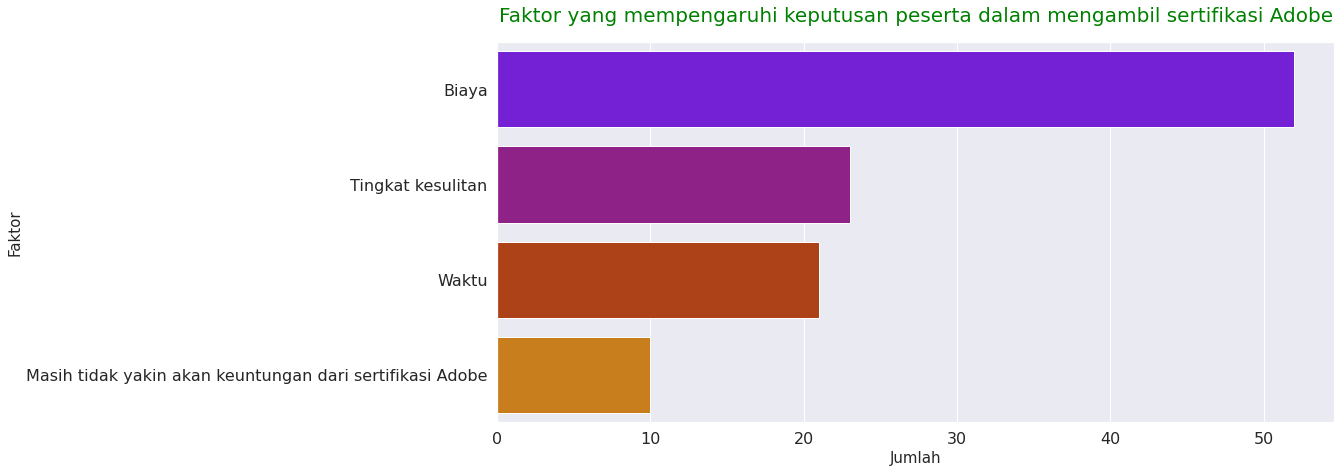

In [29]:
datax3 = [fb2, fts2, fw2, fty2]
datay3 = ['Biaya','Tingkat kesulitan','Waktu','Masih tidak yakin akan keuntungan dari sertifikasi Adobe']

plt.figure(figsize=(15,7))
#plt.bar(datay, datax)
sns.barplot(datax3, datay3, palette='gnuplot')
plt.xlabel('Jumlah', size = 15)
#plt.xticks(rotation=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Faktor', size = 15)
plt.title('Faktor yang mempengaruhi keputusan peserta dalam mengambil sertifikasi Adobe', color = 'green', size = 20, pad=20)
plt.show()

In [30]:
msb2 = data2['Kertertarikan Mengambil Sertifikasi : Mempelajari skill yang berguna'].count()
mk2 = data2['Kertertarikan Mengambil Sertifikasi : Meningkatkan kualifikasi yang diakui industri'].count()
pmp2 = data2['Kertertarikan Mengambil Sertifikasi : Meningkatkan peluang mendapat pekerjaan'].count()
md2 = data2['Kertertarikan Mengambil Sertifikasi : Mudah untuk dilakukan'].count()

print(msb2)
print(mk2)
print(pmp2)
print(md2)

59
48
43
7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


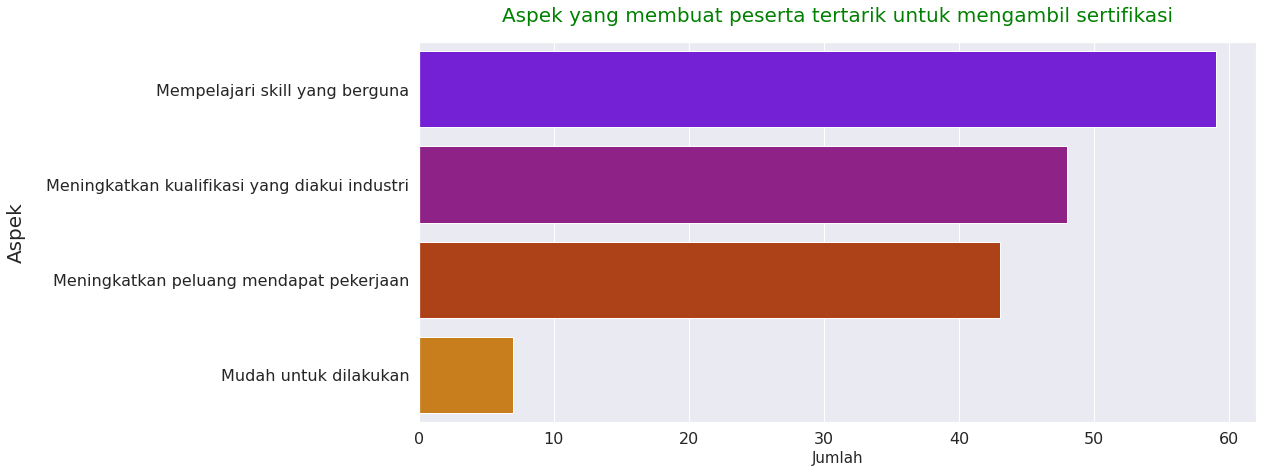

In [31]:
datax4 = [msb2, mk2, pmp2, md2]
datay4 = ['Mempelajari skill yang berguna','Meningkatkan kualifikasi yang diakui industri','Meningkatkan peluang mendapat pekerjaan','Mudah untuk dilakukan']

plt.figure(figsize=(15,7))
#plt.bar(datay, datax)
sns.barplot(datax4, datay4, palette='gnuplot')
plt.xlabel('Jumlah', size = 15)
#plt.xticks(rotation=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Aspek', size = 20, labelpad=20)
plt.title('Aspek yang membuat peserta tertarik untuk mengambil sertifikasi', color = 'green', size = 20, pad=20)
plt.show()

**Data 3 Adobe Creative Professional Tanggal 30 Juni**

In [32]:
data3 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/Adobe Creative Professional.xlsx")

In [33]:
data3.head()

,Respondent ID,Pekerjaan,Domisili,Kepuasan Webinar,Manfaat Adobe Certified Professional untuk freelancer dan designer otodidak,Bagaimana sertifikasi dapat meningkatkan kepercayaan dan kepuasan pelanggan,Bagaimana sertifikasi dapat menambah nilai karya dan meningkatkan penghasilan,Copyright dan intellectual property untuk karya Anda,Proses registrasi webinar tidak mudah dipahami,Konten / materi pembelajaran kurang sesuai dengan topik webinar,Webinar kurang interaktif,"Durasi webinar terlalu singkat, sehingga materi yang disampaikan kurang mendalam",Saran Perbaikan Selanjutnya
0,12783312878,Freelance,Bandung,3,3,4,5 - Sangat percaya diri,4,NaN,NaN,NaN,NaN,NaN
1,12783309547,Karyawan swasta,Jakarta barat,5,1 - Sangat tidak percaya diri,3,4,4,NaN,NaN,NaN,"Durasi webinar terlalu singkat, sehingga mater...","Durasi webinar terlalu singkat, sehingga mater..."
2,12780255876,Freelance,Bekasi Utara,3,3,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,NaN,NaN,NaN,"Durasi webinar terlalu singkat, sehingga mater...","Durasi webinar terlalu singkat, sehingga mater..."
3,12778434048,Frontliner,Jakarta,4,4,4,4,4,NaN,Konten / materi pembelajaran kurang sesuai den...,NaN,NaN,Konten / materi pembelajaran kurang sesuai den...
4,12777442214,Mahasiswa,Yogyakarta,5,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,NaN,NaN,NaN,"Durasi webinar terlalu singkat, sehingga mater...","Durasi webinar terlalu singkat, sehingga mater..."


## **Data 3 Preprocessing**

In [34]:
#data2.drop(['Proses registrasi webinar tidak mudah dipahami',	'Konten / materi pembelajaran kurang sesuai dengan topik webinar', 'Webinar kurang interaktif',	'Durasi webinar terlalu singkat, sehingga materi yang disampaikan kurang mendalam','Manfaat Adobe Certified Professional untuk freelancer dan designer otodidak',	'Bagaimana sertifikasi dapat meningkatkan kepercayaan dan kepuasan pelanggan','Bagaimana sertifikasi dapat menambah nilai karya dan meningkatkan penghasilan','Copyright dan intellectual property untuk karya Anda'], axis=1, inplace=True)
#data2.drop(['Saran Perbaikan Selanjutnya'], axis=1, inplace=True)

In [35]:
data3.head()

,Respondent ID,Pekerjaan,Domisili,Kepuasan Webinar,Manfaat Adobe Certified Professional untuk freelancer dan designer otodidak,Bagaimana sertifikasi dapat meningkatkan kepercayaan dan kepuasan pelanggan,Bagaimana sertifikasi dapat menambah nilai karya dan meningkatkan penghasilan,Copyright dan intellectual property untuk karya Anda,Proses registrasi webinar tidak mudah dipahami,Konten / materi pembelajaran kurang sesuai dengan topik webinar,Webinar kurang interaktif,"Durasi webinar terlalu singkat, sehingga materi yang disampaikan kurang mendalam",Saran Perbaikan Selanjutnya
0,12783312878,Freelance,Bandung,3,3,4,5 - Sangat percaya diri,4,NaN,NaN,NaN,NaN,NaN
1,12783309547,Karyawan swasta,Jakarta barat,5,1 - Sangat tidak percaya diri,3,4,4,NaN,NaN,NaN,"Durasi webinar terlalu singkat, sehingga mater...","Durasi webinar terlalu singkat, sehingga mater..."
2,12780255876,Freelance,Bekasi Utara,3,3,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,NaN,NaN,NaN,"Durasi webinar terlalu singkat, sehingga mater...","Durasi webinar terlalu singkat, sehingga mater..."
3,12778434048,Frontliner,Jakarta,4,4,4,4,4,NaN,Konten / materi pembelajaran kurang sesuai den...,NaN,NaN,Konten / materi pembelajaran kurang sesuai den...
4,12777442214,Mahasiswa,Yogyakarta,5,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,NaN,NaN,NaN,"Durasi webinar terlalu singkat, sehingga mater...","Durasi webinar terlalu singkat, sehingga mater..."


In [36]:
data3['Pekerjaan'].value_counts()

Mahasiswa                         21
Freelance                          6
-                                  5
Freelancer                         5
mahasiswi                          2
Mahasiswi                          2
Freshgraduate                      2
Pelajar                            2
pelajar                            2
Karyawan Swasta                    2
Penulis                            2
Belum bekerja                      1
Fresh Graduate                     1
Belum bekerja (Fresh Graduate)     1
Fresh graduate                     1
Guru Private                       1
Jobe Seeker                        1
Frontliner                         1
Freelance Illustrator              1
Swasta                             1
Content writer                     1
Siswa                              1
Freelance graphic designer         1
IT Development (CMS)               1
Belum                              1
mahasiswa                          1
Wiraswasta                         1
b

In [37]:
data3['Pekerjaan'].value_counts()

Mahasiswa                         21
Freelance                          6
-                                  5
Freelancer                         5
mahasiswi                          2
Mahasiswi                          2
Freshgraduate                      2
Pelajar                            2
pelajar                            2
Karyawan Swasta                    2
Penulis                            2
Belum bekerja                      1
Fresh Graduate                     1
Belum bekerja (Fresh Graduate)     1
Fresh graduate                     1
Guru Private                       1
Jobe Seeker                        1
Frontliner                         1
Freelance Illustrator              1
Swasta                             1
Content writer                     1
Siswa                              1
Freelance graphic designer         1
IT Development (CMS)               1
Belum                              1
mahasiswa                          1
Wiraswasta                         1
b

In [38]:
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Karyawan swasta ', 'Karyawan')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Karyawan swasta', 'Karyawan')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Belum bekerja (Fresh Graduate)', 'Fresh Graduate')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Freshgraduate', 'Fresh Graduate')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Fresh graduate', 'Fresh Graduate')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Freelance Illustrator', 'Freelancer')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Freelance Graphic Designer', 'Freelancer')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Freelance graphic designer ', 'Freelancer')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('SGS Smartfren', 'Karyawan')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('IT Development (CMS)', 'Karyawan')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Frontliner', 'Karyawan')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Swasta', 'Karyawan')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Karyawan Swasta', 'Karyawan')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Freelance', 'Freelancer')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Mahasiswa', 'Mahasiswa/Mahasiswi')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Mahasiswi', 'Mahasiswa/Mahasiswi')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('mahasiswi', 'Mahasiswa/Mahasiswi')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('mahasiswa', 'Mahasiswa/Mahasiswi')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('pelajar', 'Pelajar')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Siswa', 'Pelajar')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Jobe Seeker', 'Job Seeker')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('belum bekerja', 'Job Seeker')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Belum bekerja', 'Job Seeker')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('Belum', 'Job Seeker')
data3['Pekerjaan'] = data3['Pekerjaan'].replace('-', 'Tidak Ingin Menyebutkan')

In [39]:
data3.Domisili.value_counts()

Bekasi                                   5
Surabaya                                 4
Jakarta                                  4
Yogyakarta                               3
Depok                                    3
malang                                   2
Kota Probolinggo                         2
Lampung                                  2
Jakarta Selatan                          2
Semarang                                 2
Medan                                    2
Ponorogo                                 1
Garut                                    1
Cilacap                                  1
Kota Batu                                1
Sungailiat                               1
magelang                                 1
Indonesia                                1
Bandung                                  1
Kalimantan Tengah                        1
Malang                                   1
Tabanan, Bali                            1
Tangerang                                1
Probolinggo

In [40]:
print(data3.Domisili.count())

73


In [41]:
data3['Domisili'] = data3['Domisili'].replace('Bekasi', 'Jawa Barat')
data3['Domisili'] = data3['Domisili'].replace('Surabaya', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Depok', 'Jawa Barat')
data3['Domisili'] = data3['Domisili'].replace('malang', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Kota Probolinggo', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Jakarta Selatan', 'Daerah Khusus Ibukota Jakarta')
data3['Domisili'] = data3['Domisili'].replace('Semarang', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Medan', 'Sumatera Utara')
data3['Domisili'] = data3['Domisili'].replace('Ponorogo', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Garut', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Cilacap', 'Jawa Barat')
data3['Domisili'] = data3['Domisili'].replace('Kota Batu', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Bandung', 'Jawa Barat')
data3['Domisili'] = data3['Domisili'].replace('Malang', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Klaten, Jawa Tengah', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Tabanan, Bali ', 'Bali')
data3['Domisili'] = data3['Domisili'].replace('Sungailiat', 'Kepulauan Bangka Belitung')
data3['Domisili'] = data3['Domisili'].replace('magelang', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Probolinggo', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Tangerang', 'Banten')
data3['Domisili'] = data3['Domisili'].replace('Jakarta Utara', 'Daerah Khusus Ibukota Jakarta')
data3['Domisili'] = data3['Domisili'].replace('Makassar', 'Sulawesi Selatan')
data3['Domisili'] = data3['Domisili'].replace('Pati', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Kasindir', 'Sumatera Utara')
data3['Domisili'] = data3['Domisili'].replace('Purwodadi', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Jakarta barat', 'Daerah Khusus Ibukota Jakarta')
data3['Domisili'] = data3['Domisili'].replace('jakarta barat', 'Daerah Khusus Ibukota Jakarta')
data3['Domisili'] = data3['Domisili'].replace('Salatiga', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Pati', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Cilegon', 'Banten')
data3['Domisili'] = data3['Domisili'].replace('Indonesia', '-')
data3['Domisili'] = data3['Domisili'].replace('Bekasi Utara', 'Jawa Barat')
data3['Domisili'] = data3['Domisili'].replace('Bondowoso', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Lamongan', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('surabaya', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Bogor', 'Jawa Barat')
data3['Domisili'] = data3['Domisili'].replace('Sidoarjo-Jawa Timur', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Tanjungpinang ', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Kec. Bekasi Timur', 'Jawa Barat')
data3['Domisili'] = data3['Domisili'].replace('Denpasar, Bali', 'Bali')
data3['Domisili'] = data3['Domisili'].replace('Tabanan - Bali', 'Bali')
data3['Domisili'] = data3['Domisili'].replace('Kota Semarang, Jawa Tengah, Indonesia', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Semarang, Jawa Tengah, Indonesisa', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Palembang', 'Sumatera Selatan')
data3['Domisili'] = data3['Domisili'].replace('Tanjungpinang', 'Riau')
data3['Domisili'] = data3['Domisili'].replace('Ngawi', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Demak', 'Jawa Tengah')
data3['Domisili'] = data3['Domisili'].replace('Lumajang', 'Jawa Timur')
data3['Domisili'] = data3['Domisili'].replace('Tangerang Selatan', 'Banten')
data3['Domisili'] = data3['Domisili'].replace('Jakarta', 'Daerah Khusus Ibukota Jakarta')
data3['Domisili'] = data3['Domisili'].replace('Yogyakarta', 'Daerah Istimewa Yogyakarta')

In [42]:
data3c = data3.copy()
data3c.head()

,Respondent ID,Pekerjaan,Domisili,Kepuasan Webinar,Manfaat Adobe Certified Professional untuk freelancer dan designer otodidak,Bagaimana sertifikasi dapat meningkatkan kepercayaan dan kepuasan pelanggan,Bagaimana sertifikasi dapat menambah nilai karya dan meningkatkan penghasilan,Copyright dan intellectual property untuk karya Anda,Proses registrasi webinar tidak mudah dipahami,Konten / materi pembelajaran kurang sesuai dengan topik webinar,Webinar kurang interaktif,"Durasi webinar terlalu singkat, sehingga materi yang disampaikan kurang mendalam",Saran Perbaikan Selanjutnya
0,12783312878,Freelancer,Jawa Barat,3,3,4,5 - Sangat percaya diri,4,NaN,NaN,NaN,NaN,NaN
1,12783309547,Karyawan,Daerah Khusus Ibukota Jakarta,5,1 - Sangat tidak percaya diri,3,4,4,NaN,NaN,NaN,"Durasi webinar terlalu singkat, sehingga mater...","Durasi webinar terlalu singkat, sehingga mater..."
2,12780255876,Freelancer,Jawa Barat,3,3,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,NaN,NaN,NaN,"Durasi webinar terlalu singkat, sehingga mater...","Durasi webinar terlalu singkat, sehingga mater..."
3,12778434048,Karyawan,Daerah Khusus Ibukota Jakarta,4,4,4,4,4,NaN,Konten / materi pembelajaran kurang sesuai den...,NaN,NaN,Konten / materi pembelajaran kurang sesuai den...
4,12777442214,Mahasiswa/Mahasiswi,Daerah Istimewa Yogyakarta,5,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,5 - Sangat percaya diri,NaN,NaN,NaN,"Durasi webinar terlalu singkat, sehingga mater...","Durasi webinar terlalu singkat, sehingga mater..."


In [43]:
data3pr = data3['Proses registrasi webinar tidak mudah dipahami'].count()
data3ks = data3['Konten / materi pembelajaran kurang sesuai dengan topik webinar'].count()
data3wki = data3['Webinar kurang interaktif'].count()
data3dts = data3['Durasi webinar terlalu singkat, sehingga materi yang disampaikan kurang mendalam'].count()

print(data3pr)
print(data3ks)
print(data3wki)
print(data3dts)

11
5
11
43


In [44]:
#from google.colab import drive
#drive.mount('/drive')
#data3.to_excel('/drive/My Drive/Adobe Creative Professional Baru.xlsx')

## **Data 3 Visualisasi**

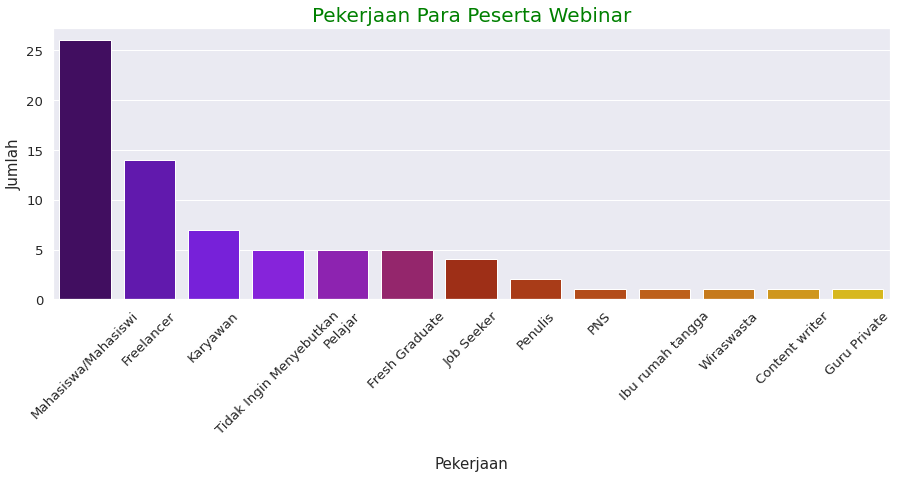

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(data =data3, x = data3.Pekerjaan.value_counts().head(20).index, y = data3.Pekerjaan.value_counts().head(20).values, palette='gnuplot')
plt.xlabel('Pekerjaan', size = 15, labelpad=20)
plt.xticks(rotation=45)
plt.ylabel('Jumlah', size = 15)
plt.title('Pekerjaan Para Peserta Webinar', color = 'green', size = 20)
plt.show()

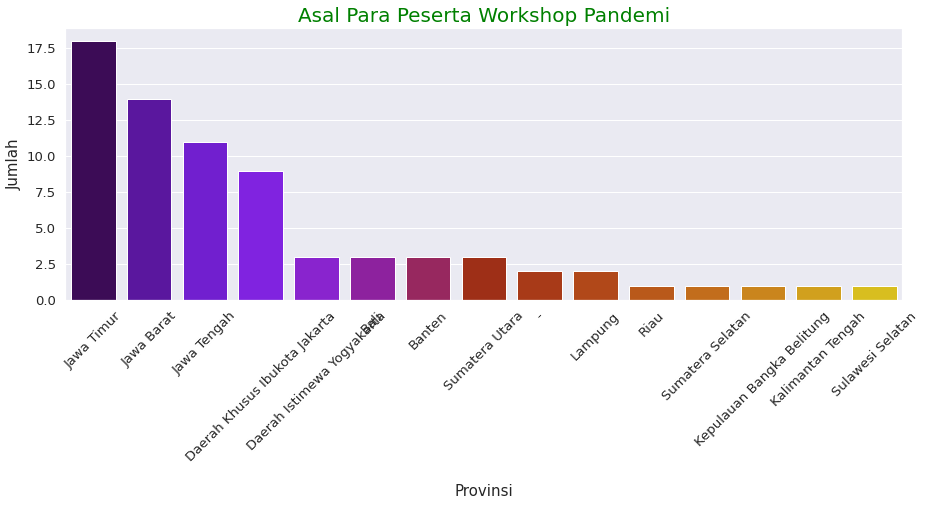

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(data=data3, x = data3.Domisili.value_counts().head(20).index, y = data3.Domisili.value_counts().head(20).values, palette='gnuplot')
plt.xlabel('Provinsi', size = 15, labelpad=20)
plt.xticks(rotation=45)
plt.ylabel('Jumlah', size = 15)
plt.title('Asal Para Peserta Workshop Pandemi', color = 'green', size = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


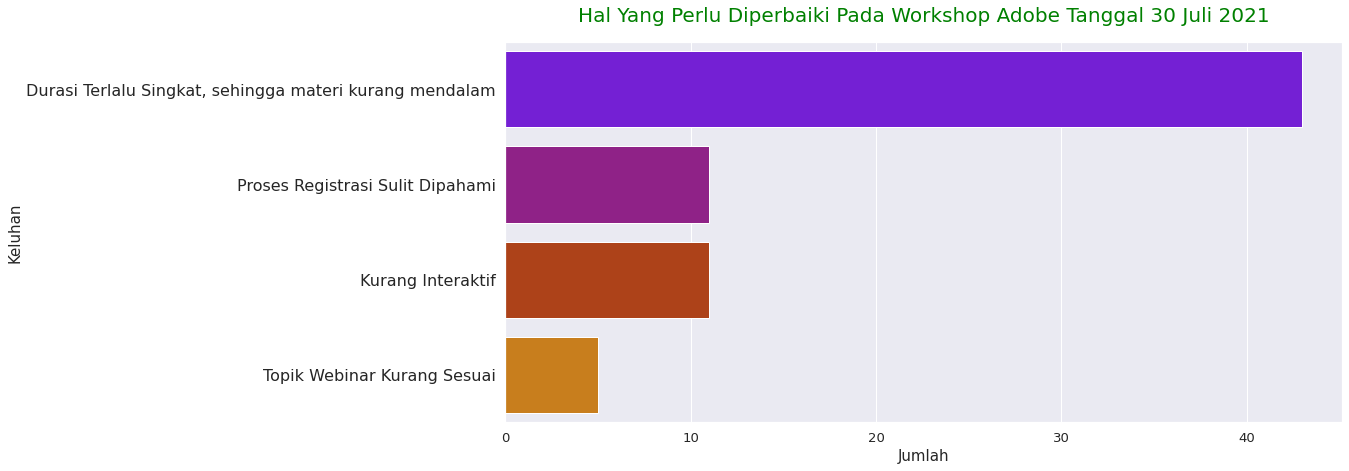

In [47]:
datax = [data3dts, data3pr, data3wki, data3ks]
datay = ['Durasi Terlalu Singkat, sehingga materi kurang mendalam','Proses Registrasi Sulit Dipahami','Kurang Interaktif','Topik Webinar Kurang Sesuai']

plt.figure(figsize=(15,7))
#plt.bar(datay, datax)
sns.barplot(datax, datay, palette='gnuplot')
plt.xlabel('Jumlah', size = 15)
#plt.xticks(rotation=25)
plt.ylabel('Keluhan', size = 15)
plt.yticks(fontsize=16)
plt.title('Hal Yang Perlu Diperbaiki Pada Workshop Adobe Tanggal 30 Juli 2021', color = 'green', size = 20, pad=20)
plt.show()

## **Data 4 Workshop Wanita Karir**

In [48]:
data4 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/Talk Show Wanita Karir.xlsx")

In [49]:
data4.head()

,Timestamp,ID,"Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk mulai menjadi Perempuan Karir?","Setelah mengikuti acara kami, pahamkah Anda terhadap persiapan berkarir khususnya bagi Perempuan?","Setelah mengikuti acara kami, seberapa pahamkah Anda dengan materi yang disampaikan?","Menurut Anda, seberapa memuaskan kah topik yang disajikan di acara ini?",Mohon untuk memberikan rating untuk instruktur.,"Mohon untuk memberikan rating kelas ""Jadi Perempuan Karir? Siapa Takut!""",Seberapa bermanfaat kah acara ini dalam membantu menambah kepercayaan diri Anda untuk mulai berkarir?,"Dari skala 1-10, seberapa mungkin Anda merekomendasikan Masterclass ""Jadi Perempuan Karir? Siapa Takut!""?",Hal apa yang paling Anda sukai dari acara ini?,Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?,"MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!"
0,2021-12-10 11:32:45.233,5015,3,3,3,4,5,5,5,9,NaN,NaN,NaN
1,2021-12-10 11:32:58.676,6291,4,4,4,5,5,5,5,10,NaN,NaN,NaN
2,2021-12-10 11:33:09.940,2087,5,5,5,5,5,5,5,10,NaN,NaN,NaN
3,2021-12-10 11:33:21.530,8926,3,4,4,4,4,4,3,8,Membangun dan membantu meningkatkan percaya diri,NaN,NaN
4,2021-12-10 11:33:52.269,8537,3,3,3,3,3,3,3,6,.,.,.


In [50]:
data4.rename(columns = {'Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk mulai menjadi Perempuan Karir?':'Kesiapan Karier', 
                        'Setelah mengikuti acara kami, pahamkah Anda terhadap persiapan berkarir khususnya bagi Perempuan?':'Pemahaman Karier',
                        'Setelah mengikuti acara kami, seberapa pahamkah Anda dengan materi yang disampaikan?':'Pemahaman Peserta',
                        'Menurut Anda, seberapa memuaskan kah topik yang disajikan di acara ini?':'Kepuasan Peserta',
                        'Mohon untuk memberikan rating untuk instruktur.':'Rating Instruktur',
                        'Mohon untuk memberikan rating kelas "Jadi Perempuan Karir? Siapa Takut!"':'Rating Kelas',
                        'Seberapa bermanfaat kah acara ini dalam membantu menambah kepercayaan diri Anda untuk mulai berkarir?':'Manfaat Acara',
                        'Dari skala 1-10, seberapa mungkin Anda merekomendasikan Masterclass "Jadi Perempuan Karir? Siapa Takut!"?':'Rekomendasi',
                        'Hal apa yang paling Anda sukai dari acara ini?':'Hal Yang Disukai',
                        'Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?':'Improve',
                        'MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!':'Ide Topik'}, inplace = True)

In [51]:
data4.head()

,Timestamp,ID,Kesiapan Karier,Pemahaman Karier,Pemahaman Peserta,Kepuasan Peserta,Rating Instruktur,Rating Kelas,Manfaat Acara,Rekomendasi,Hal Yang Disukai,Improve,Ide Topik
0,2021-12-10 11:32:45.233,5015,3,3,3,4,5,5,5,9,NaN,NaN,NaN
1,2021-12-10 11:32:58.676,6291,4,4,4,5,5,5,5,10,NaN,NaN,NaN
2,2021-12-10 11:33:09.940,2087,5,5,5,5,5,5,5,10,NaN,NaN,NaN
3,2021-12-10 11:33:21.530,8926,3,4,4,4,4,4,3,8,Membangun dan membantu meningkatkan percaya diri,NaN,NaN
4,2021-12-10 11:33:52.269,8537,3,3,3,3,3,3,3,6,.,.,.


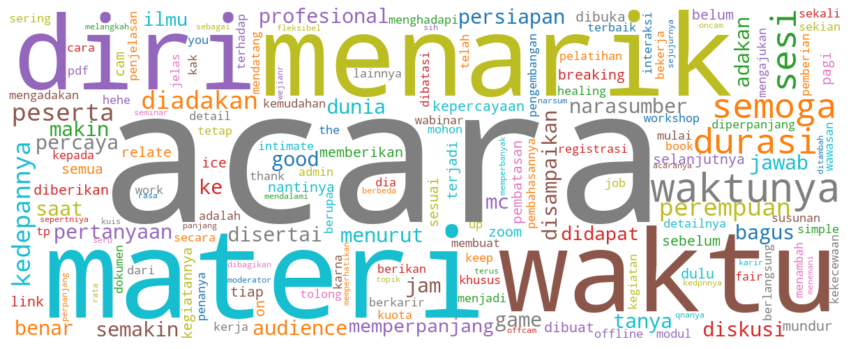

In [52]:
data4['Improve'] = data4['Improve'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali']

# Create and generate a word cloud image:
ide_words = ' '.join(data4['Improve'].dropna().values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Data 5 Domisili Peserta**

In [53]:
data5 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/Asal Domisili Pekerjaan Peserta.xlsx")
data5 = data5.sort_values(by="Jumlah Peserta", ascending=False)
data5.head()

,Provinsi,Jumlah Peserta
3,Jawa Barat,458
0,Daerah khusus Ibukota Jakarta,230
1,Jawa Timur,220
2,Jawa Tengah,133
6,Banten,123


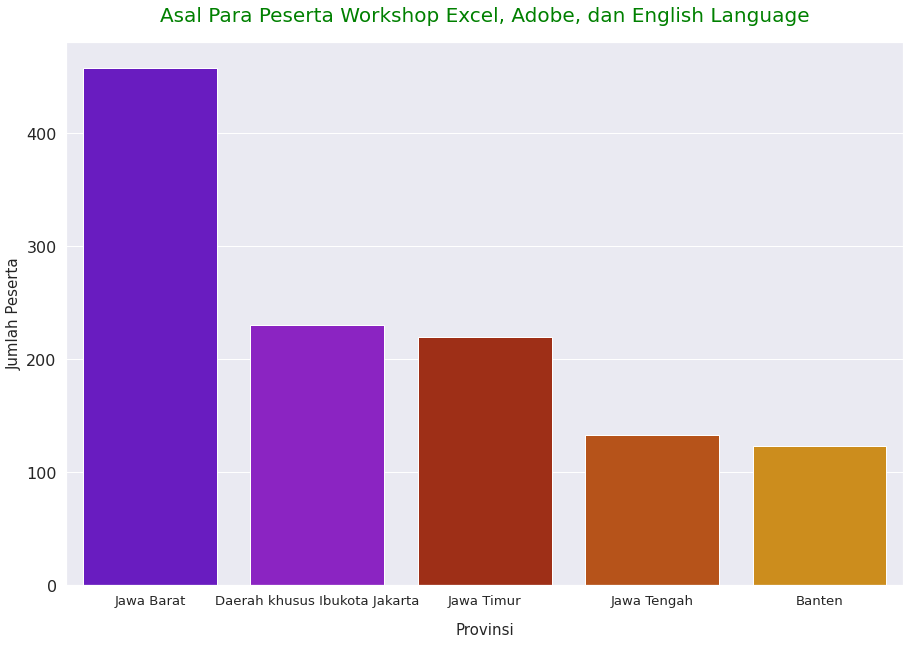

In [54]:
plt.figure(figsize=(15,10))
#plt.bar(datay, datax)
sns.barplot(data=data5.head(5), x="Provinsi", y="Jumlah Peserta", palette='gnuplot')
plt.xlabel('Provinsi', size = 15, labelpad=15)
#plt.xticks(rotation=25)
plt.ylabel('Jumlah Peserta', size = 15)
plt.yticks(fontsize=16)
plt.title('Asal Para Peserta Workshop Excel, Adobe, dan English Language', color = 'green', size = 20, pad=20)
plt.show()

## **Data 6**

In [55]:
data6 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/Asal Domisili Pekerjaan Peserta.xlsx", sheet_name="Pekerjaan")
data6 = data6.sort_values(by="Jumlah", ascending=False)
data6.head()

,Pekerjaan,Jumlah
0,Fresh Graduate,436
2,Pencari Kerja,295
1,Mahasiswa / pelajar,224
5,Pekerja profesional,39
6,Freelancer,26


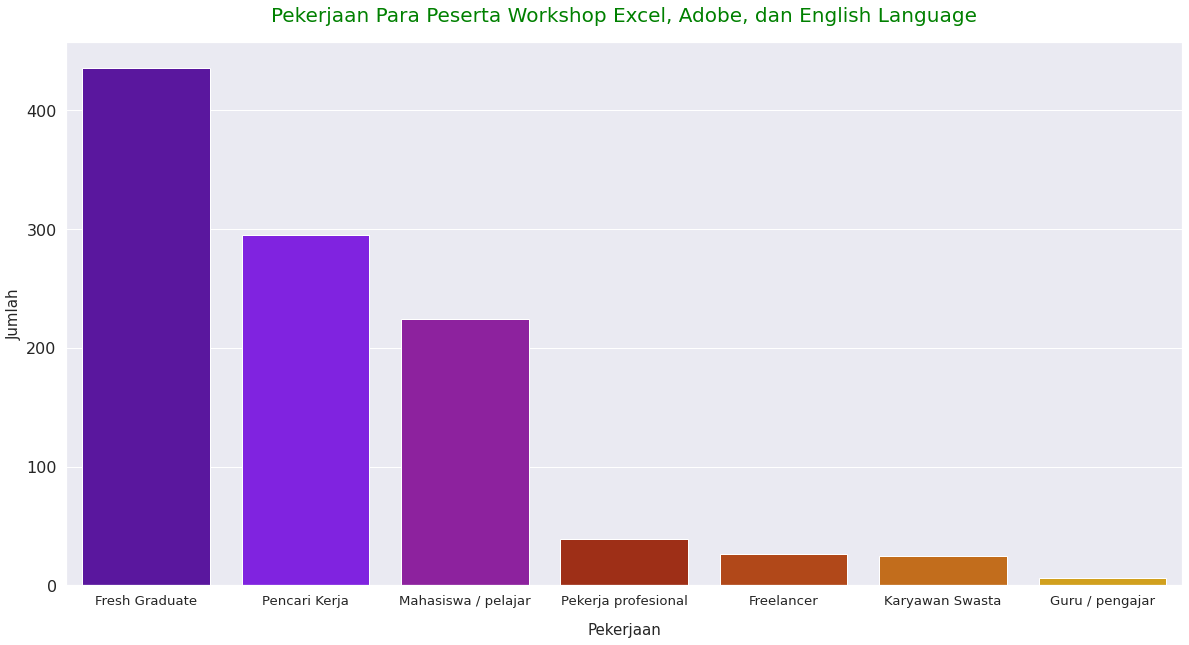

In [56]:
plt.figure(figsize=(20,10))
#plt.bar(datay, datax)
sns.barplot(data=data6.head(10), x="Pekerjaan", y="Jumlah", palette='gnuplot')
plt.xlabel("Pekerjaan", size = 15, labelpad=15)
#plt.xticks(rotation=25)
plt.ylabel("Jumlah", size = 15)
plt.yticks(fontsize=16)
plt.title('Pekerjaan Para Peserta Workshop Excel, Adobe, dan English Language', color = 'green', size = 20, pad=20)
plt.show()

In [57]:
data7 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/Gabungan Tiap Kelas Excel.xlsx")
data7.head()

,Apa saja tantangan yang Kamu hadapi saat menggunakan Microsoft Excel?,Apa yang kamu harapkan dari pelatihan yang Kamu ikuti?,"Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [COUNTIF, SUMIF]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [COUNTIF, SUMIF] Ket","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [Perhitungan dasar (basic calculations)]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [Perhitungan dasar (basic calculations)] Ket","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [VLOOKUP]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [VLOOKUP] Ket","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [HLOOKUP]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [HLOOKUP] Ket"
0,Rumus didalam excel,Peningkatan Skill,2.0,Tidak Paham,4.0,Paham,2.0,Tidak Paham,2.0,Tidak Paham
1,Penggunaan rumus dalam microsoft excel,Peningkatan Skill,5.0,Sangat Paham,5.0,Sangat Paham,5.0,Sangat Paham,5.0,Sangat Paham
2,function di excel,Belajar hal baru,3.0,Cukup Paham,3.0,Cukup Paham,3.0,Cukup Paham,3.0,Cukup Paham
3,Memahami rumus agak susah,Belajar hal baru,5.0,Sangat Paham,5.0,Sangat Paham,5.0,Sangat Paham,5.0,Sangat Paham
4,1. Masalah beda versi pada MS Excel 2. Permas...,Belajar hal baru,5.0,Sangat Paham,5.0,Sangat Paham,5.0,Sangat Paham,5.0,Sangat Paham


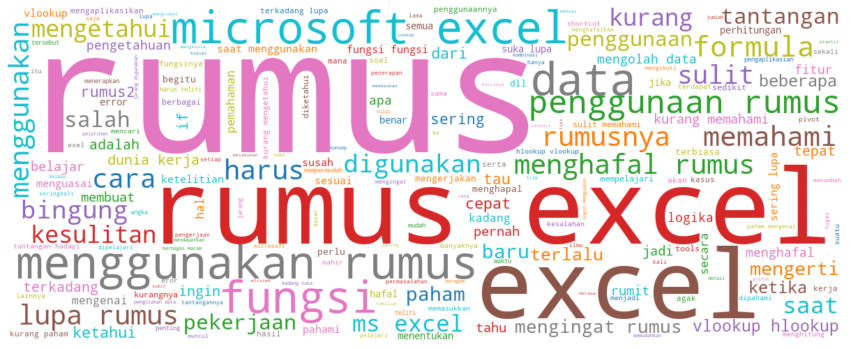

In [58]:
data7['Apa saja tantangan yang Kamu hadapi saat menggunakan Microsoft Excel?'] = data7['Apa saja tantangan yang Kamu hadapi saat menggunakan Microsoft Excel?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali','belum','yg']

# Create and generate a word cloud image:
ide_words = ' '.join(data7['Apa saja tantangan yang Kamu hadapi saat menggunakan Microsoft Excel?'].dropna().values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Yang Diharapkan Peserta Dari Pelatihan')

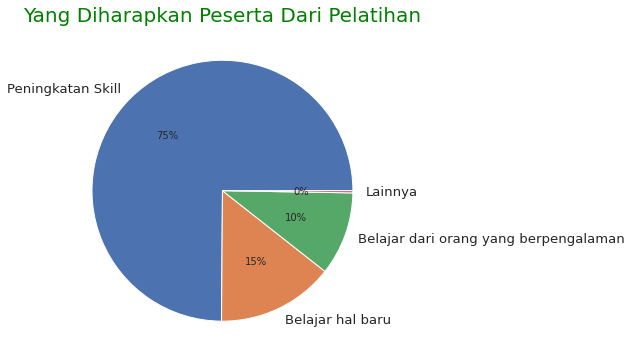

In [59]:
nilaihp = data7['Apa yang kamu harapkan dari pelatihan yang Kamu ikuti?'].value_counts().values
judulhp = data7['Apa yang kamu harapkan dari pelatihan yang Kamu ikuti?'].value_counts().index

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(nilaihp, labels = judulhp, autopct='%1.0f%%')
ax.set_title('Yang Diharapkan Peserta Dari Pelatihan', color = 'green', size = 20)

## **Fungsi Dasar Excel Tanggal 30 September 2021**

In [60]:
data8 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/30_9_2021 Post-Survey_ Fungsi Dasar Excel.xlsx")
data8.head()

,Timestamp,ID,"Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk menggunakan fungsi dan rumus dalam Microsoft Excel?","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [COUNTIF, SUMIF]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [Perhitungan dasar (basic calculations)]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [VLOOKUP]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [HLOOKUP]","Menurut Anda, seberapa memuaskan kah topik yang disajikan di acara ini?",Seberapa memanfaat kah acara ini dalam membantu Anda meningkatkan kemampuan Anda dalam dunia kerja?,Silakan berikan penilaian terhadap acara secara keseluruhan.,"Dari skala 1-10, seberapa mungkin Anda merekomendasikan acara/program MyEduSolve kepada orang lain?",Silakan tuliskan komentar lain yang ingin Anda sampaikan.
0,2021-09-30 12:56:32.325,6002.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,1,NaN
1,2021-09-30 11:49:47.748,1592.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2,NaN
2,2021-09-30 12:47:52.214,6641.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,2,seharus nya diawali dari materi dasar dulu kar...
3,2021-09-30 11:57:45.050,1167.0,3.0,1.0,3.0,3.0,3.0,2.0,2.0,3.0,4,"Kurang, dari judul yang ditetapkan saya kira b..."
4,2021-09-30 11:46:20.529,7546.0,4.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5,-


In [61]:
csif = round(data8['Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [COUNTIF, SUMIF]'].mean(),2)
bcln = round(data8['Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [Perhitungan dasar (basic calculations)]'].mean(),2)
vlp = round(data8['Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [VLOOKUP]'].mean(),2)
hlp = round(data8['Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [HLOOKUP]'].mean(),2)

print(csif)
print(bcln)
print(vlp)
print(hlp)

3.49
3.74
3.66
3.63


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


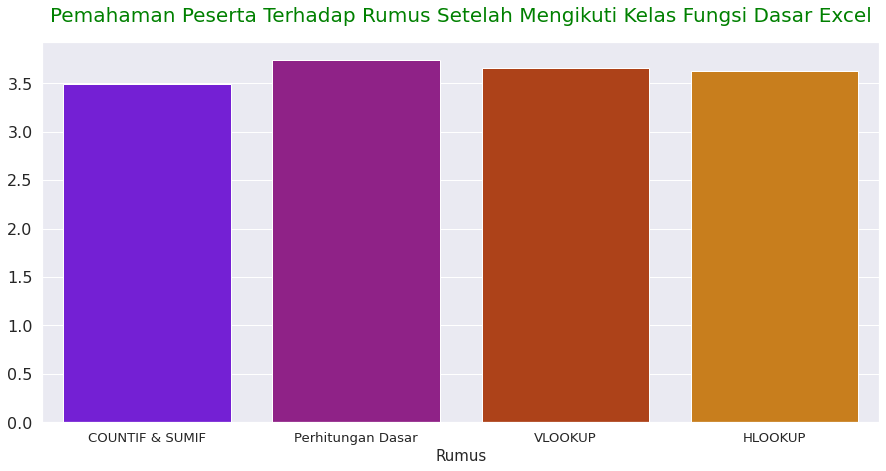

In [62]:
data8x = [csif, bcln, vlp, hlp]
data8y = ['COUNTIF & SUMIF','Perhitungan Dasar','VLOOKUP','HLOOKUP']

plt.figure(figsize=(15,7))
#plt.bar(datay, datax)
sns.barplot(data8y, data8x, palette='gnuplot')
plt.xlabel('Rumus', size = 15)
#plt.xticks(rotation=25)
#plt.ylabel('Keluhan', size = 15)
plt.yticks(fontsize=16)
plt.title('Pemahaman Peserta Terhadap Rumus Setelah Mengikuti Kelas Fungsi Dasar Excel', color = 'green', size = 20, pad=20)
plt.show()

In [63]:
data9 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/27_10_2021 Post-Survey_ Rumus Excel Untuk Pekerja Kantoran.xlsx")
data9.head()

,Timestamp,ID,"Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk menggunakan fungsi dan rumus dalam Microsoft Excel?","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [COUNTIF, SUMIF]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [Perhitungan dasar (basic calculations)]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [VLOOKUP]","Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [HLOOKUP]","Menurut Anda, seberapa memuaskan kah topik yang disajikan di acara ini?",Seberapa memanfaat kah acara ini dalam membantu Anda meningkatkan kemampuan Anda dalam dunia kerja?,Silakan berikan penilaian terhadap acara secara keseluruhan.,"Dari skala 1-10, seberapa mungkin Anda merekomendasikan acara/program MyEduSolve kepada orang lain?",Hal apa yang paling Anda sukai dari acara ini?,Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?,"MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!"
0,2021-10-27 14:46:54.162,4145,3,2,4,2,2,3,3,4,7,NaN,NaN,NaN
1,2021-10-27 14:47:24.416,2109,5,5,5,5,5,5,5,5,9,Memberikan materi excel dengan sangat jelas da...,Pemateri sangat bagus,Excel lagi tidak apa apa :D
2,2021-10-27 14:47:26.124,3784,4,3,3,3,3,5,5,5,10,NaN,NaN,Mengenai publik speaking
3,2021-10-27 14:47:28.792,2530,5,5,5,5,5,4,5,5,9,NaN,NaN,NaN
4,2021-10-27 14:47:28.830,1458,5,5,5,5,5,5,5,5,10,Semuanya,Banyak,Oke


In [64]:
csif2 = round(data9['Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [COUNTIF, SUMIF]'].mean(),2)
bcln2 = round(data9['Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [Perhitungan dasar (basic calculations)]'].mean(),2)
vlp2 = round(data9['Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [VLOOKUP]'].mean(),2)
hlp2 = round(data9['Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [HLOOKUP]'].mean(),2)

print(csif2)
print(bcln2)
print(vlp2)
print(hlp2)

3.71
3.96
3.61
3.6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


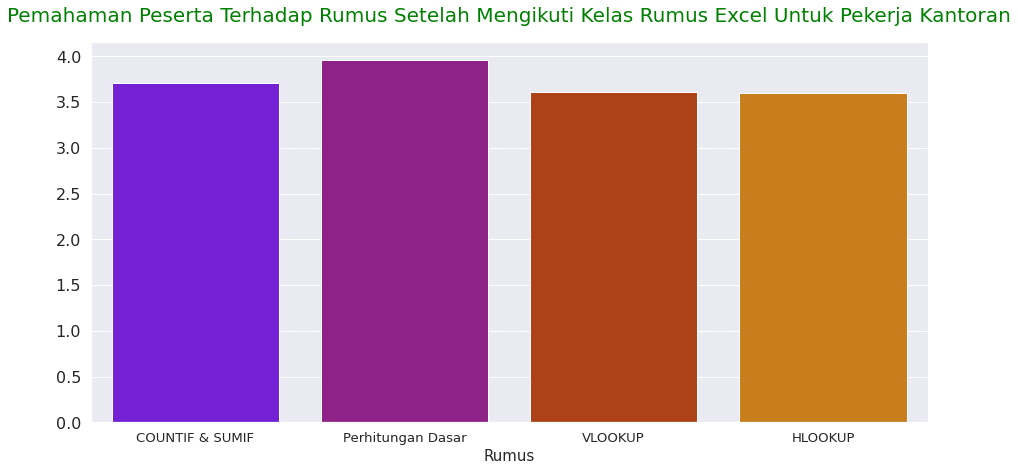

In [65]:
data9x = [csif2, bcln2, vlp2, hlp2]
data9y = ['COUNTIF & SUMIF','Perhitungan Dasar','VLOOKUP','HLOOKUP']

plt.figure(figsize=(15,7))
#plt.bar(datay, datax)
sns.barplot(data9y, data9x, palette='gnuplot')
plt.xlabel('Rumus', size = 15)
#plt.xticks(rotation=25)
#plt.ylabel('Keluhan', size = 15)
plt.yticks(fontsize=16)
plt.title('Pemahaman Peserta Terhadap Rumus Setelah Mengikuti Kelas Rumus Excel Untuk Pekerja Kantoran', color = 'green', size = 20, pad=20)
plt.show()